In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
ppdf = pd.read_csv("/work/Run_For_Life/dataset_halfSecondWindow.csv", index_col=0)

In [3]:
ppdf.head()

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,156664,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,156665,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12


In [4]:
ppdf.columns

Index(['id', 'time', 'activityrecognition#0', 'activityrecognition#1',
       'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min',
       'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.gravity#mean', 'android.sensor.gravity#min',
       'android.sensor.gravity#max', 'android.sensor.gravity#std',
       'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'android.sensor.light#mean', 'android.sensor.light#min',
       'android.se

ignore:
light, pressure, magnetic field, gravity,rotation vector, sound, uncalibrated gyroscope and
proximity.

In [5]:
small_df = ppdf.drop(['android.sensor.light#mean', 'android.sensor.light#min','android.sensor.light#max', 'android.sensor.light#std',
       'android.sensor.pressure#mean', 'android.sensor.pressure#min','android.sensor.pressure#max', 'android.sensor.pressure#std',
       'android.sensor.magnetic_field#mean',
       'android.sensor.magnetic_field#min',
       'android.sensor.magnetic_field#max',
       'android.sensor.magnetic_field#std',
       'android.sensor.magnetic_field_uncalibrated#mean',
       'android.sensor.magnetic_field_uncalibrated#min',
       'android.sensor.magnetic_field_uncalibrated#max',
       'android.sensor.magnetic_field_uncalibrated#std',
        'android.sensor.gravity#mean', 'android.sensor.gravity#min','android.sensor.gravity#max', 'android.sensor.gravity#std',
       'android.sensor.proximity#mean', 'android.sensor.proximity#min',
       'android.sensor.proximity#max', 'android.sensor.proximity#std',
       'android.sensor.rotation_vector#mean',
       'android.sensor.rotation_vector#min',
       'android.sensor.rotation_vector#max',
       'android.sensor.rotation_vector#std',
        'sound#mean', 'sound#min', 'sound#max', 'sound#std',
        'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std'],axis=1)

In [6]:
small_df.shape

(62585, 34)

In [7]:
#small_df.to_csv('/work/Run_For_Life/small_df.csv')

In [8]:
small_df.head()

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,android.sensor.step_counter#mean,android.sensor.step_counter#min,android.sensor.step_counter#max,android.sensor.step_counter#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,...,1809.0,1809.0,1809.0,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,...,1809.0,1809.0,1809.0,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,...,1809.0,1809.0,1809.0,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,156664,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,...,1809.0,1809.0,1809.0,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,156665,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,...,1809.0,1809.0,1809.0,NaN,NaN,NaN,NaN,NaN,Bus,U12


In [9]:
no_nan_df = small_df.fillna(0)

In [10]:
no_nan_df.head()

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,android.sensor.step_counter#mean,android.sensor.step_counter#min,android.sensor.step_counter#max,android.sensor.step_counter#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,156661,3.0,0.0,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,...,1809.0,1809.0,1809.0,0.0,0.0,0.0,0.0,0.0,Bus,U12
1,156662,4.0,0.0,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,...,1809.0,1809.0,1809.0,0.0,0.0,0.0,0.0,0.0,Bus,U12
2,156663,5.0,0.0,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,...,1809.0,1809.0,1809.0,0.0,0.0,0.0,0.0,0.0,Bus,U12
3,156664,6.0,0.0,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,...,1809.0,1809.0,1809.0,0.0,0.0,0.0,0.0,0.0,Bus,U12
4,156665,7.0,0.0,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,...,1809.0,1809.0,1809.0,0.0,0.0,0.0,0.0,0.0,Bus,U12


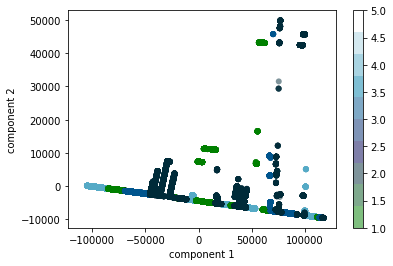

In [11]:
#PCA

pca = PCA(4)
projected=pca.fit_transform(no_nan_df.drop(['target','user'],axis=1))

plt.scatter(projected[:, 0], projected[:, 1],
            c=no_nan_df.target.map({"Bus":5, "Car":4, "Still": 1, "Train":3, "Walking": 2}), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('ocean', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [20]:
y = small_df.target.map({"Bus":5, "Car":4, "Still": 1, "Train":3, "Walking": 2})
x = small_df.drop(['target',"user"],axis=1)


In [13]:
small_df.head()

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,android.sensor.step_counter#mean,android.sensor.step_counter#min,android.sensor.step_counter#max,android.sensor.step_counter#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,...,1809.0,1809.0,1809.0,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,...,1809.0,1809.0,1809.0,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,...,1809.0,1809.0,1809.0,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,156664,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,...,1809.0,1809.0,1809.0,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,156665,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,...,1809.0,1809.0,1809.0,NaN,NaN,NaN,NaN,NaN,Bus,U12


In [21]:

from sklearn.inspection import permutation_importance
r = permutation_importance(XGBClassifier().fit(x,y), x, y,
                        n_repeats=30,
                        random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.user

[13:18:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


NameError: name 'df' is not defined

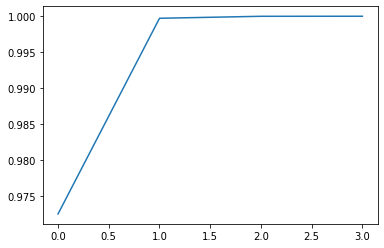

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
##################################
### OUTPUT OF APPLICATION
#####################

# 1. DAILY TRAVEL SUMMARIZER
# - PURPOSE: Categorises and summarises your travels of the day.
# - INPUT: a set of sensor readings for a 'day' (test set)
# - classifies each readings activitiy
# - summarises the proportion of each time spent on each travel class

# 2. WALK SUMMARIZER
# - PURPOSE: Gives detailed analysis of a walk
# - INPUT: Set of walking sensor readings.
# - Calculates distance travelled 
# - Elevation gains/losses over walk
# - if user enters age/height/weight calculate estimated calorie burn, else use average values of population(android.country?)


### FOR 1. Classify the travel type
n, c = np.unique(ppdf['target'], return_counts=True)
print(len(ppdf['target']))

for n, c in zip(n,c):
    print(n,c)

print(ppdf.info())


62585
Bus 12517
Car 12518
Still 12516
Train 12517
Walking 12517
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62585 entries, 0 to 62584
Data columns (total 70 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               62585 non-null  int64  
 1   time                                             62585 non-null  float64
 2   activityrecognition#0                            0 non-null      float64
 3   activityrecognition#1                            62585 non-null  float64
 4   android.sensor.accelerometer#mean                62585 non-null  float64
 5   android.sensor.accelerometer#min                 62585 non-null  float64
 6   android.sensor.accelerometer#max                 62585 non-null  float64
 7   android.sensor.accelerometer#std                 62583 non-null  float64
 8   android.sensor.game_rotation_vector#mean  

# Machine Learning

In [15]:
from sklearn                    import metrics
from sklearn.linear_model       import LogisticRegression, LinearRegression, RidgeClassifier, Lasso
from sklearn.neural_network     import MLPClassifier
from sklearn                    import svm
from sklearn.preprocessing      import StandardScaler, OrdinalEncoder, OneHotEncoder, PowerTransformer, QuantileTransformer
from sklearn.cluster            import KMeans
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.naive_bayes        import GaussianNB, MultinomialNB
from sklearn.model_selection    import cross_val_score, ShuffleSplit, GridSearchCV, train_test_split, StratifiedKFold, cross_val_predict
from sklearn                    import pipeline
from sklearn.tree               import DecisionTreeClassifier
from sklearn.experimental       import enable_hist_gradient_boosting # for HistGradientBoostingClassifier
from sklearn.ensemble           import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost                    import XGBClassifier
from lightgbm                   import LGBMClassifier
from catboost                   import CatBoostClassifier
from sklearn                    import impute
from sklearn import compose

In [ ]:
#####################################################
## TEST TRAIN  SPLIT --> USER 12 TEST. ELSE TRAIN 

In [ ]:

train_users = ppdf[ppdf['user'] != "U12"]
test_user = ppdf[ppdf['user'] == "U12"]
print(len(train_users))
print(len(test_user))

train_features = [
    "android.sensor.accelerometer#mean", "android.sensor.accelerometer#min", "android.sensor.accelerometer#max", "android.sensor.accelerometer#std",
    "sound#mean", "sound#min", "sound#max", "sound#std",
    "android.sensor.gyroscope#mean", "android.sensor.gyroscope#min", "android.sensor.gyroscope#max", "android.sensor.gyroscope#std",
    "speed#mean", "speed#min", "speed#max", "speed#std",
    "android.sensor.orientation#mean", "android.sensor.orientation#min", "android.sensor.orientation#max", "android.sensor.orientation#std", 
    "android.sensor.linear_acceleration#mean" ,"android.sensor.linear_acceleration#min" ,"android.sensor.linear_acceleration#max" ,"android.sensor.linear_acceleration#std",
    "android.sensor.rotation_vector#mean",  "android.sensor.rotation_vector#min",  "android.sensor.rotation_vector#max",  "android.sensor.rotation_vector#std", 
    "android.sensor.gyroscope_uncalibrated#mean", "android.sensor.gyroscope_uncalibrated#min", "android.sensor.gyroscope_uncalibrated#max", "android.sensor.gyroscope_uncalibrated#std",  
    ]


#### NOW TESTING WITH ALL
X_train = train_users.drop(['target'], axis=1)
Y_train = train_users['target'].map({"Bus":1, "Car":2, "Still": 3, "Train":4, "Walking": 5}) 
X_test = test_user.drop(['target'], axis=1)
Y_test = test_user['target'].map({"Bus":1, "Car":2, "Still": 3, "Train":4, "Walking": 5})
# print(len(X_train))
# print(len(Y_train))
# print(X_train.info())
print(Y_test.unique())
print(Y_train.unique())
cat_columns = ['user']
num_columns = list(train_users.drop(['target','user', 'id'], axis=1).columns)
print(num_columns)

cat_tree_pipe = pipeline.Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan))
])
num_tree_pipe = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='mean'))
])
tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_tree_pipe, num_columns),
    ('cat',  cat_tree_pipe, cat_columns)],
    remainder='drop')



cat_mult_pipe = pipeline.Pipeline(steps=[
    ('oneHot', OneHotEncoder(handle_unknown="ignore")),
])
num_mult_pipe = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='mean')),
    ('Quantile Transform',QuantileTransformer(n_quantiles=100, output_distribution='normal')),
])
mult_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_mult_pipe, num_columns),
    ('cat',  cat_mult_pipe, cat_columns)],
    remainder='drop')


53504
9081
[1 2 3 4 5]
[1 2 3 4 5]
['time', 'activityrecognition#0', 'activityrecognition#1', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.game_rotation_vector#mean', 'android.sensor.game_rotation_vector#min', 'android.sensor.game_rotation_vector#max', 'android.sensor.game_rotation_vector#std', 'android.sensor.gravity#mean', 'android.sensor.gravity#min', 'android.sensor.gravity#max', 'android.sensor.gravity#std', 'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std', 'android.sensor.gyroscope_uncalibrated#mean', 'android.sensor.gyroscope_uncalibrated#min', 'android.sensor.gyroscope_uncalibrated#max', 'android.sensor.gyroscope_uncalibrated#std', 'android.sensor.light#mean', 'android.sensor.light#min', 'android.sensor.light#max', 'android.sensor.light#std', 'android.sensor.linear_acceleration#mean', '

In [ ]:
tree_classifiers = {
        "Decision Tree": DecisionTreeClassifier(),
        "Extra Trees":ExtraTreesClassifier(),
        "Random Forest":RandomForestClassifier(),
        "AdaBoost":AdaBoostClassifier(),
        #"Skl GBM":GradientBoostingClassifier(), TAKES FOREVER
        "Skl HistGBM":HistGradientBoostingClassifier(),
        #"XGBoost":XGBClassifier(use_label_encoder=False),
        #"LightGBM":LGBMClassifier(),
        "CatBoost":CatBoostClassifier(verbose=0)
        }
mult_classifiers = {
        "LM Ridge": RidgeClassifier(),
        "NN Multi layer Perceptron": MLPClassifier(random_state=909),
        "SVM Linear": svm.SVC(kernel='linear'),
        "SVM RBF": svm.SVC(kernel='rbf'),
        "KNN": KNeighborsClassifier(),
        "BM Guassian Naive Bayes": GaussianNB(),
}



all_tree_pipes= {model_name: pipeline.make_pipeline(tree_prepro, model) for model_name, model in tree_classifiers.items()}

all_mult_pipes= {model_name: pipeline.make_pipeline(mult_prepro, model) for model_name, model in tree_classifiers.items()}


In [ ]:
###############################################################################
### ALL FEATURES TREE  IMPUTE
treeResults = pd.DataFrame({"Model_name": [], "Acc_score":[], "Bal_score":[]})
for model_name, model in all_tree_pipes.items():
    print(f"Trying model : {model_name}")
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)    
    u = np.unique(preds)
    x  = np.unique(Y_test)
    print(u, x)
    acc_score = metrics.accuracy_score(Y_test, preds)
    bal_score = metrics.balanced_accuracy_score(Y_test,preds)
    print(f"{model_name}, {acc_score}, {bal_score}")
    treeResults= treeResults.append({"Model_name": model_name,
                    "Acc_score": acc_score,
                    "Bal_score": bal_score}, ignore_index=True)

Trying model : Decision Tree


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:

MultResults= pd.DataFrame({"Model_name": [], "Acc_score":[], "Bal_score":[]})
for model_name, model in all_mult_pipes.items():
    print(f"Trying model : {model_name}")
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)    
    u = np.unique(preds)
    x  = np.unique(Y_test)
    print(u, x)
    acc_score = metrics.accuracy_score(Y_test, preds)
    bal_score = metrics.balanced_accuracy_score(Y_test,preds)
    print(f"{model_name}, {acc_score}, {bal_score}")
    MultResults= MultResults.append({"Model_name": model_name,
                    "Acc_score": acc_score,
                    "Bal_score": bal_score}, ignore_index=True)

Trying model : Decision Tree


IndexError: single positional indexer is out-of-bounds

In [ ]:
df=pd.read_csv("/work/U1/sensorfile_U1_Bus_1480485018989.csv",sep=")",header=None)
df.columns=["main"]

# Calculate calories

Minimum burned calories per day:

For men: 66 + (6.2 x weight) + (12.7 x height) – (6.76 x age) 

For women: 655.1 + (4.35 x weight) + (4.7 x height) – (4.7 x age)

In [27]:
def daily_cal(sex='male',weight=80,height=170,age=35):
    #weight in kg, height in cm
    if sex == 'male':
        result = 66 + 6.2*weight + 12.7*height - 6.76*age
    if sex == 'female':
        result = 655.1 + 4.35*weight + 4.7*height - 4.7*age
    return result

daily_cal()

2484.4

Calories burned walking

Weight	3.5 mph — flat surface	3.5 mph — uphill
130 lbs.	224 cal.	354 cal.
155 lbs.	267 cal.	422 cal.
180 lbs.	311 cal.	490 cal.
205 lbs.	354 cal.	558 cal.

The average person will burn between 80 to 140 calories per mile. 30 minutes of running will burn between 280 and 520 calories, depending on your weight and speed. The calories burned running will depend on your weight, time spent running and to a lesser degree, your speed. Use the calculator for a custom calculation.


Total calories burned = Duration (in minutes)*(MET*3.5*weight in kg)/2002﻿

Calculators have an activity MET (metabolic equivalent for task) built-in. This number estimates how much energy the body uses during a specific activity. It varies based on activity and is standardized so that it can be used across the board for different people and so that it's easier to compare different activities to each other.

In [29]:
#MET=1 if sitting or in transportation vehicle
def cal_burned(MET=1,weight=80,time=120):
    #weight in kg, time in minutes
    return time*3.5*MET*weight/2002

a = cal_burned()
#walking MET=3
b = cal_burned(3,80,120)

a+b

#daily calories
daily_cal()+a+b

2551.532867132867

At rest or sitting idly, the average person expends 1 MET, which equals:

1 kilocalorie per kilogram of body weight times minutes of activity

Under 3 MET: Light-intensity activities

3 to 6 MET: Moderate-intensity aerobic physical activities

Over 6 MET: Vigorous-intensity aerobic physical activities

In [ ]:
new=[]
for row in df["main"]:
    a=row.split(",")
    new.append(len(a))

In [ ]:
columns=[i for i in range(max(new))]
columns

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [ ]:
for i in columns:
    df[i]=np.nan

result=[]
new=[]
for row in range(len(df["main"])):
    a=df["main"][row].split(",")
    #print(a)
    for i in range(len(a)):
        df[i][row]=a[i]

df #name the columns


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,main,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"2,android.sensor.accelerometer,0.5828552,6.734...",2.0,android.sensor.accelerometer,0.582855,6.734940,6.423767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"63,android.sensor.accelerometer,0.48954773,6.8...",63.0,android.sensor.accelerometer,0.489548,6.811951,7.616898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"111,android.sensor.accelerometer,0.23820496,6....",111.0,android.sensor.accelerometer,0.238205,6.443451,7.495621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"160,android.sensor.accelerometer,0.25022888,6....",160.0,android.sensor.accelerometer,0.250229,6.151337,6.884811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"214,android.sensor.gyroscope,-0.3206787,-7.476...",214.0,android.sensor.gyroscope,-0.320679,-0.000748,-0.123337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,"500295,android.sensor.rotation_vector,-0.09396...",500295.0,android.sensor.rotation_vector,-0.093969,-0.379427,-0.911158,0.130368,0.174533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9746,"500347,android.sensor.gyroscope_uncalibrated,0...",500347.0,android.sensor.gyroscope_uncalibrated,0.051865,0.325439,0.337738,0.025589,0.013428,-0.021484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9747,"500401,android.sensor.accelerometer,2.9073944,...",500401.0,android.sensor.accelerometer,2.907394,5.206390,5.968475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9748,"500452,android.sensor.rotation_vector,-0.09822...",500452.0,android.sensor.rotation_vector,-0.098223,-0.390182,-0.900756,0.163548,0.174533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dd66c499-8cd9-44d2-87d5-ecc9c3ddd387' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>